1. [Missing Data and Sample Clustering - Random Forest](#missing-data-and-sample-clustering---random-forest)

#### Missing Data and Sample Clustering - Random Forest:
##### Missing Data:
For category values missing:
- the missing value is filled based on the majority of the values for the feature with relevance to the output class

For numerical values missing:
- the missing value is filled based on the average of values for the feature with relevance to the output class

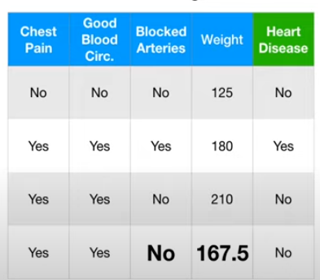

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/missing_values.png')
new_image = img.resize((320, 280))
display(new_image)

##### Refining the filled missing values:
- consider the random forest has 10 as the number of estimators i.e. 10 decision trees will be created
- create a proximity table 

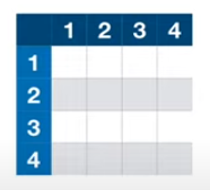

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/proximity_table.png')
new_image = img.resize((210, 190))
display(new_image)

- find the similarity between records by running down the first tree
- fill the proximity table with 1 for similar records

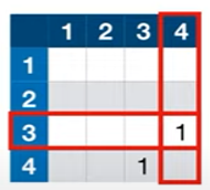

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/proximity_table1.png')
new_image = img.resize((210, 190))
display(new_image)

- find the similarity between records by running down the second tree

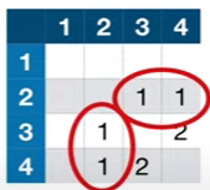

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/proximity_table2.png')
new_image = img.resize((210, 190))
display(new_image)

- find the similarity between records by running down the third tree

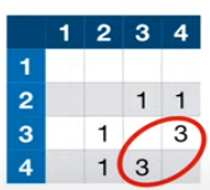

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/proximity_table3.png')
new_image = img.resize((210, 190))
display(new_image)

- After running down the records in N trees built

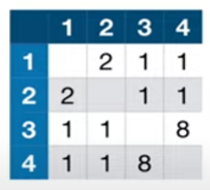

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/proximity_tablen.png')
new_image = img.resize((210, 190))
display(new_image)

- we convert the values in the proximity table into probabilities i.e. value/number of trees eg: 3/10

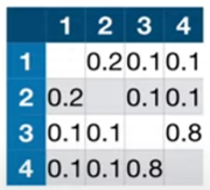

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/prob.png')
new_image = img.resize((210, 190))
display(new_image)

- now, we calculate the weighted frequency of the labels in the feature to handle the missing values for the same feature
- multiply the (weighted frequency of Yes/No) * (weight of Yes/No)
    - Yes = 1/3 * the weight of Yes
    - No = 2/3 * the weight of No

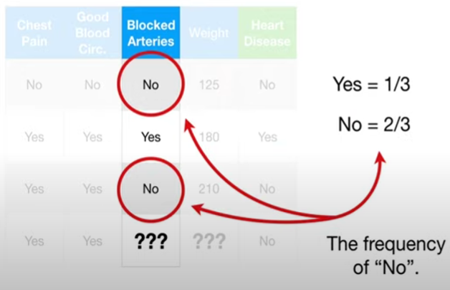

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/freq.png')
new_image = img.resize((450, 290))
display(new_image)

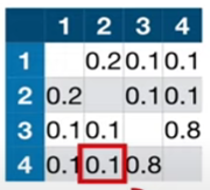

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/weightyes.png')
new_image = img.resize((210, 190))
display(new_image)

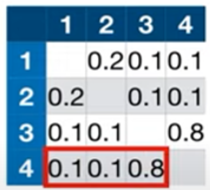

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sumweightyes.png')
new_image = img.resize((210, 190))
display(new_image)

- weight for Yes = Proximity of Yes/All proximities
    - 0.1 / (0.1 + 0.1 + 0.8) = 0.1/1 => 0.1
- weight for No = Proximity of No/All proximities
    - (0.1 + 0.8)/(0.1 + 0.1 + 0.8) = 0.9/1 => 0.9

- Therefore,
    - Yes = 1/3 * 0.1 => 0.03
    - No = 2/3 * 0.9 => 0.6
- Now, we choose the revised missing value is No based on the highest value comparing both Yes & No labels for the feature
- Likewise, we perform the same for the missing values for the weight feature
    - Weighted average = (sample 1 weight * average weight of sample 1 w.r.t proximity table) + (sample 2 weight * average weight of sample 2 w.r.t proximity table) + (sample 3 weight * average weight of sample 3 w.r.t proximity table)
        - (125 * 0.1/(0.1+0.1+0.8)) + (180 * 0.1/(0.1+0.1+0.8)) + (210 * 0.8/(0.1+0.1+0.8)) = (125 * 0.1) + (185 * 0.1) + (210 * 0.8) => 198.5
- We repeat the entire steps about 6-7 times until we reach convergence that there is no change in the value obtained

#### Sample Clustering:
- Created proximity table when subtracted with minus 1 gives us the distance i.e. similarity between the datapoints. We can find it out using MDS (Multidimensional Scaling) plot or HeatMap
    - 1 - Proximity table value => Distance (MDS)


Prediction:
- Consider, we have a sample test record with missing values which needs to predict the output class

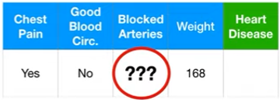

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/test.png')
new_image = img.resize((280, 100))
display(new_image)

- now, we make two copies of the data with both the output labels (since its a binary classification problem)
- now, we will repeat the same iterative steps of guessing the possible outcomes first such as cretaing proximity table, calculating the weights, etc until convergence

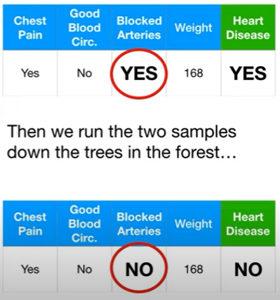

In [24]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/possible_values.png')
new_image = img.resize((280, 300))
display(new_image)

- now, when we run the the possible values down the N number of trees built, to predict the correct output label for the record
- we find the "Yes" label from the tree was labelled the majority of times

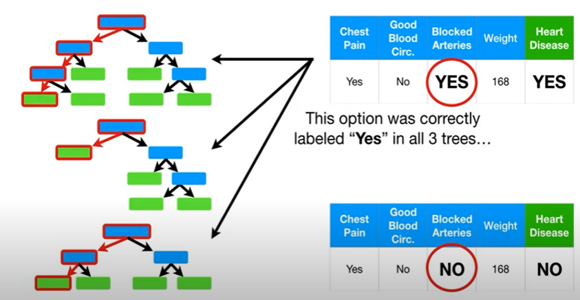

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/predict.png')
new_image = img.resize((580, 300))
display(new_image)